<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Wine Quality</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-07-12 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 3.0</font></h3>

### Your information:
- Fullname: Trần Hải Bình
- Date of birth: 19/01/1995
- Place of birth: HCMC
- Email: habi.mis.95@gmail.com
- Mobile phone: 0947051901

In this notebook, we practice all the knowledge and skills that we learned in this course.
Please choose one suitable algorithm (**Linear Regression**) to predict: "wine quality" by accuracy evaluation methods.

Please read [Wine Quality information](https://archive.ics.uci.edu/ml/datasets/wine+quality) carefully before you do this project! 

Dataset: winequality-red.csv and winequality-white.csv

#### Attribute Information:

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

###### Output variable (based on sensory data):
12. quality (score between 0 and 10)

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [25]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [26]:
white = pd.read_csv('winequality-white.csv', sep = ';')
red = pd.read_csv('winequality-red.csv', sep = ';')

In [27]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [29]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [30]:
#check null 'red'
pd.isnull(red) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


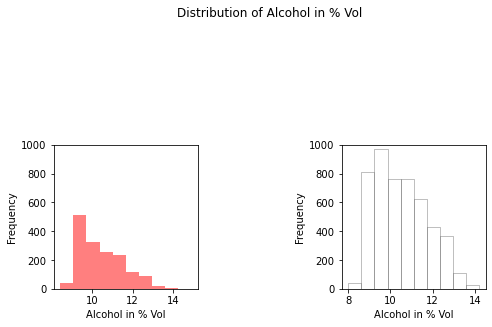

In [31]:
# Histogram Distribution of Alchol
fig, ax = plt.subplots(1, 2) 
  
ax[0].hist(red.alcohol, 10, facecolor ='red', 
              alpha = 0.5, label ="Red wine") 
  
ax[1].hist(white.alcohol, 10, facecolor ='white', 
           ec ="black", lw = 0.5, alpha = 0.5, 
           label ="White wine") 
  
fig.subplots_adjust(left = 0, right = 1, bottom = 0,  
               top = 0.5, hspace = 0.05, wspace = 1) 
  
ax[0].set_ylim([0, 1000]) 
ax[0].set_xlabel("Alcohol in % Vol") 
ax[0].set_ylabel("Frequency") 
ax[1].set_ylim([0, 1000]) 
ax[1].set_xlabel("Alcohol in % Vol") 
ax[1].set_ylabel("Frequency") 
  
fig.suptitle("Distribution of Alcohol in % Vol") 
plt.show() 

In [32]:
# Add `type` column to `red` with price one 
red['type'] = 1
  
# Add `type` column to `white` with price zero 
white['type'] = 0
  
# Append `white` to `red` 
wines = red.append(white, ignore_index = True) 
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [33]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [34]:
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 
X = wines.drop(['quality'],axis=1)
y = wines['quality']
  
# Splitting the data set for training and validating  
X_train, X_test, y_train, y_test = train_test_split( 
           X, y, test_size = 0.34, random_state = 45) 

In [35]:
# Remove Duplicates
wines = wines.drop_duplicates()
wines.shape

(5320, 13)

In [36]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [37]:
# Correlation
corr = wines.corr()['quality'].drop('quality')
corr

fixed acidity          -0.080092
volatile acidity       -0.265205
citric acid             0.097954
residual sugar         -0.056830
chlorides              -0.202137
free sulfur dioxide     0.054002
total sulfur dioxide   -0.050296
density                -0.326434
pH                      0.039733
sulphates               0.041884
alcohol                 0.469422
type                   -0.114809
Name: quality, dtype: float64

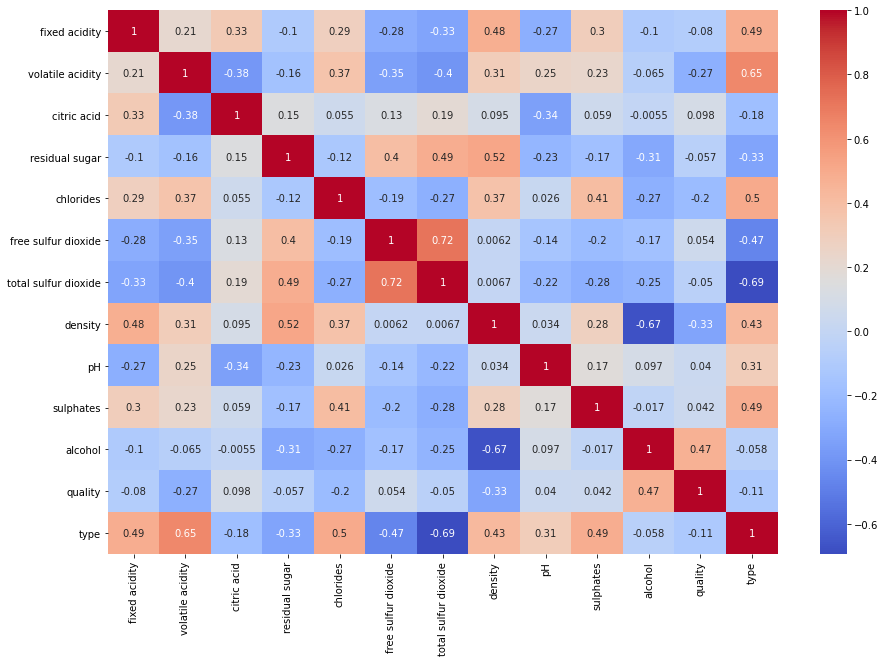

In [38]:
import seaborn as sns
plt.subplots(figsize=(15, 10))
sns.heatmap(wines.corr(), annot = True, cmap = "coolwarm")

In [39]:
def features(correlation_threshold):
    abs_corrs = corr.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [40]:
list_features = features(0.06)
list_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'chlorides',
 'density',
 'alcohol',
 'type']

## Linear Regression 


In [41]:
from sklearn.linear_model import LinearRegression


x = wines[list_features]
y = wines['quality']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=1)
print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (4256, 7) (4256,)
Test set: (1064, 7) (1064,)


Intercept: -19.909503924326536
Coefcient: [-0.04309334 -1.57630574  0.12550545 -0.82911877 22.77669724  0.36486609
  0.25175641]


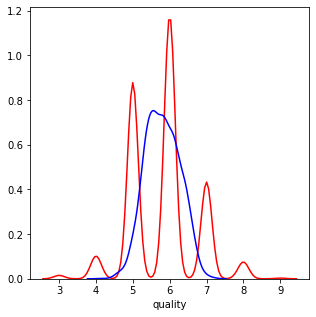

R_square: 0.28411249062894395
MSE: 0.5529659296982589


In [43]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Intercept:',lr.intercept_)
print('Coefcient:',lr.coef_)
yhat_train = lr.predict(x_train)
plt.figure(figsize=(5,5))
ax1 = sns.distplot(y_train,hist=False,color='r')
sns.distplot(yhat_train,hist=False,color='b',ax=ax1)
plt.show()
plt.close()
print('R_square:',lr.score(x_train,y_train))
print('MSE:',mean_squared_error(yhat_train,y_train))

Intercept: -43.7848722379016
Coefcient: [-4.19615411e-02 -1.72422861e+00  8.88557606e-02 -5.03647559e-01
  4.63704722e+01  4.07523022e-01  2.40172318e-01]


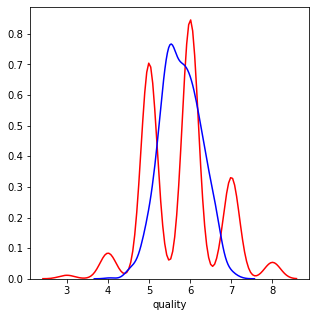

R_square: 0.29926557629972284
MSE: 0.5456939861553436


In [44]:
lr = LinearRegression()
lr.fit(x_test,y_test)
print('Intercept:',lr.intercept_)
print('Coefcient:',lr.coef_)
yhat_test = lr.predict(x_test)
plt.figure(figsize=(5,5))
ax1 = sns.distplot(y_test,hist=False,color='r')
sns.distplot(yhat_test,hist=False,color='b',ax=ax1)
plt.show()
plt.close()
print('R_square:',lr.score(x_test,y_test))
print('MSE:',mean_squared_error(yhat_test,y_test))